<a href="https://colab.research.google.com/github/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/ACD_T8_Arvores_de_Decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Árvores de Decisão</font></h1>
<hr>

# **Árvores de Decisão**
 
Uma Árvore de Decisão permite fazer classificações por **particionamentos sucessivos** dos dados. É uma estrutura que traduz uma tabela de decisão.


<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/TIC/decisiontree.PNG" width=500, align="center"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# Algoritmo de Hunt

Vejamos um exemplo.

In [ ]:
import pandas as pd
comics = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/comics.csv',sep=';')
comics

,Name,sex,smokes,tie,mask,cape,ears,class
0,Batman,male,no,no,yes,yes,yes,good
1,Robin,male,no,no,yes,yes,yes,good
2,Catwoman,female,no,no,yes,no,yes,bad
3,Joker,male,no,no,no,no,no,bad
4,Alfred,male,no,yes,no,no,no,good
5,Penguin,male,yes,yes,no,no,no,bad


Acesse para detalhes http://meusite.mackenzie.br/rogerio/TIC/comics.xlsx

# Ganho de Informação

Como você viu diferentes Árvores de Decisão podem ser construídas. A decisão dos Algoritmos para a decisão de que atributos empregar como Raiz e Nós na construção de uma Árvore são feitos com base em medidas do Ganho de Informação.

Para o cálculo do **Ganho de Informação** de um atributo existem 3 valores comumente empregados.

## **Entropia.**

$$ Entropia(s) = - \sum_i p_i log p_i $$

Exemplos:

$$ Entropia(CONSTANTE) = 0 $$
$$ Entropia(bit) = 1 $$

## **Índice Gini.**

$$ Gini(s) = 1 - \sum_i p_i $$ 

## **Classification Error**

$$ ClassificationError = 1 - max p_i $$

<br>

O ganho de informação é então obtido como:

$$ IG(a) = D(T) - \sum_i p_i D(T | a_i) $$

Onde $D()$ é uma das medidas de Entropia, índice *Gini* ou *Classification Error*. 

# Prós e Limitações do Modelo

## Prós
* Não é um modelo *black-box*
* É eficiente
* **Permite trabalhar diretamente com valores categóricos**

## Limitações
* Tem um alto custo de treinamento
* É sensível a sobreajuste(\*)

(\*) Para minimizar esse efeito pode-se fazer a *poda* de níveis da Árvore ou emprego de **Random Forests**, entendidas como uma média de Árvores de Decisão.


# **IMPORTANTE:** Antes de começar 

Execute a célula final desse Lab. Ela irá **inicializar** o seu ambiente com os datasets requeridos para esse lab que poderão ser então lidos como arquivos locais, isto é `df = pd.read_csv('df.csv')`. 

Após a execução você pode verificar os datasets criados na aba lateral do Google Colab ou no seu diretório de trabalho.

# Case: **Previsão do Sucesso de novos Projetos**, com Knn e uma Árvore de Decisão

Compare verifique que a estrutura de uso dos modelos é a mesma. 

### IMPORTANTE
> A *mesma estrutura* pode ser empregada para diferentes modelos de **Aprendizado Supervisionado**, como **knn**,  **Árvores de Decisão** e ainda NaiveBayes, Logist Regression, Random Forest etc.  

> A *mesma estrutura* pode ser empregada para diferentes dados, `projects`, `insurance`, `breast`... em modelos de **Aprendizado Supervisionado**.  


## Solução empregando o modelo Knn

Veja abaixo a solução de predição do status de projetos com o modelo `knn`.

In [ ]:
# Acessando os dados
projects = pd.read_csv('projects.csv')
print(projects.head())

new_projects = pd.read_csv('new_projects.csv')
print(new_projects.head())


   Ana  Gabriela  Pedro  Luiz     Status
0    1         1      0     1  successed
1    1         1      1     1  successed
2    0         0      1     0     failed
3    0         0      1     1     failed
   Ana  Gabriela  Pedro  Luiz Status
0    0         1      1     0      ?
1    1         1      1     0      ?


In [ ]:
from sklearn import neighbors

# Prepara os dados para o Treinamento
X_train = projects.drop(columns=['Status'])           # Entradas
y_train = projects['Status']                          # Saída

# Declara o Modelo
n_neighbors = 3                                       # Parametros do modelo
clf = neighbors.KNeighborsClassifier(n_neighbors)     #

# Treinamento (Treina o Modelo) 
clf.fit(X_train, y_train)                             # Treinamento

# Predição (Emprega o Modelo) 
X_test = new_projects.drop(columns=['Status'])        # Dados para predição
y_pred = clf.predict(X_test)                          # Resposta do modelo

print(y_pred)



['failed' 'successed']


In [ ]:
new_projects['Status'] = y_pred
print(new_projects)

   Ana  Gabriela  Pedro  Luiz     Status
0    0         1      1     0     failed
1    1         1      1     0  successed


## Solução empregando Árvore de Decisão

Veja agora o mesmo problema com uma **Árvore de Decisão**.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Prepara os dados para o Treinamento
X_train = projects.drop(columns=['Status'])           # Entradas
y_train = projects['Status']                          # Saída

# Declara o Modelo
clf = DecisionTreeClassifier()
'''
clf = DecisionTreeClassifier(criterion='gini',
#                              min_samples_leaf=5,
#                              min_samples_split=5,
                              max_depth=None,
                              random_state=seed)
'''
# Treinamento (Treina o Modelo) 
clf.fit(X_train, y_train)                             # Treinamento

# Predição (Emprega o Modelo) 
X_test = new_projects.drop(columns=['Status'])        # Dados para predição
y_pred = clf.predict(X_test)                          # Resposta do modelo

print(y_pred)

['successed' 'successed']


## **Experimente você**

Empregue os códigos acima e faça a predição de Faixas de Seguros empregando o **modelo de Árvore de Decisão** as bases de `insurances` criadas no Set Up desse notebook.

```
insurance.csv
new_insurance.csv
```


# Avaliando os modelos

Assim como você empregou o `R-Squared` para avaliar um modelo de Regressão Linear é importante termos uma forma de avaliarmos os modelos de Classificação.

Vamos então aprender e praticar os seguintes conceitos:

1.   **Conjunto de Treinamento** e **Conjunto de Teste** 
1.   Acuracidade
1.   Matriz de Confusão

Nossa avaliação dos modelos vai se concentrar na **acuracidade do modelo** e na **matriz de confusão** com seus resultados embora existam muitas outras métricas. 

Podemos fazer isso medindo a quantidade de acertos do modelo sobre uma **parcela do conjunto de treinamento** que separamos para servir de **Conjunto de Teste**. Como para esses dados temos as respostas, podemos 'medir' o percentual de acerto do nosso modelo.

Isso serve para verificar se nosso modelo tem um grau de assertividade aceitável, além de poder ser empregado para:

1. **Ajustar os modelos** (*k do knn, profundidade da Árvore em uma Árvore de Decisão*) 
1. **Selecionar os modelos** (*entre dois modelos para classificação, um knn e outro uma Árvore de Decisão, você pode optar pelo de maior acuracidade*)





# Caso: **Predição de Diagnósticos a partir de Dados de Imagens** 

Agora vamos ver um caso de dados reais.

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Veja também: https://niklausliu.github.io/files/Yi-Decision%20Tree%20Model%20in%20the%20Diagnosis%20of%20Breast%20Cancer.pdf

Os dados estão na URL: https://meusite.mackenzie.br/rogerio/TIC/breast-cancer-wisconsin.csv

Mas aqui empregue os dados já tratados no set up do Lab:

```
breast.csv
new_breast.csv
```



In [ ]:
# Acessando os Dados

# Seu código aqui 
breast = pd.read_csv('breast.csv')
print(breast.head())

new_breast = pd.read_csv('new_breast.csv')
print(new_breast.head())


  diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0         M        17.99  ...          0.4601                  0.11890
1         M        20.57  ...          0.2750                  0.08902
2         M        19.69  ...          0.3613                  0.08758
3         M        11.42  ...          0.6638                  0.17300
4         M        20.29  ...          0.2364                  0.07678

[5 rows x 31 columns]
   radius_mean  texture_mean  ...  fractal_dimension_worst  diagnosis
0        6.981          9.71  ...                  0.05504          ?
1       11.700         16.17  ...                  0.07146          ?
2       13.370         18.84  ...                  0.08004          ?
3       15.780         21.80  ...                  0.09208          ?
4       28.110         39.28  ...                  0.20750          ?

[5 rows x 31 columns]


In [ ]:
# Explore os dados
# Seu código aqui
breast.shape
breast.diagnosis.value_counts()
breast.isnull().sum()
breast.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

# **Árvore de Decisão**: Treinamento e Teste

Os conjuntos de Treinamento e Teste são produzidos **randomicamente**. O `seed` é a semente de geração aleatória e garante a reprodutibilidade das execuções. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Preparando os dados
X = breast.drop(columns=['diagnosis'])
y = breast['diagnosis']

# Separando os dados de Treinamento e Teste
seed = 1984
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=seed)

# Declarando o Modelo
clf = DecisionTreeClassifier(criterion='gini',
#                              min_samples_leaf=5,
#                              min_samples_split=5,
                              max_depth=None,
                              random_state=seed)

# Aprendizado 
clf.fit(X_train, y_train)                  # Emprega o conjunto de treinamento 

y_pred = clf.predict(X_test)

print(y_pred)


['M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B'
 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M'
 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B']


# Apresentando os resultados

Não se preocupe com este código, ele está aqui apenas para apresentar os resultados para que você entenda o que está acontecendo. 

In [ ]:
# pd.set_option('display.max_rows',None)

a = pd.DataFrame(y_pred)
b = pd.DataFrame(np.array(y_test))
c = a == b
d = pd.concat([a,b,c],axis=1)

d.columns=['Real','Predicted','Equal?']
# print(d)
print(d[d['Equal?'] == False])


    Real Predicted  Equal?
14     B         M   False
24     B         M   False
29     M         B   False
32     M         B   False
60     M         B   False
61     B         M   False
78     B         M   False
79     M         B   False
82     B         M   False
100    B         M   False
159    M         B   False
167    B         M   False


# Interpretando o **`classification_report`**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
    
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(classification_report(y_test, y_pred))

[[102   7]
 [  5  57]]
0.9298245614035088
              precision    recall  f1-score   support

           B       0.95      0.94      0.94       109
           M       0.89      0.92      0.90        62

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.92       171
weighted avg       0.93      0.93      0.93       171



# Exibindo a Árvore

Não vamos trabalhar com o gráfico das Árvores. Mas deixamos o código aqui para que você empregue se tiver interesse.

[Text(207.0853448275862, 203.85, 'X[28] <= 0.142\ngini = 0.467\nsamples = 398\nvalue = [250, 148]'),
 Text(148.6396551724138, 176.67000000000002, 'X[21] <= 17.72\ngini = 0.148\nsamples = 261\nvalue = [240, 21]'),
 Text(101.01724137931033, 149.49, 'X[14] <= 42.95\ngini = 0.078\nsamples = 247\nvalue = [237, 10]'),
 Text(63.49655172413793, 122.31, 'X[21] <= 15.77\ngini = 0.049\nsamples = 238\nvalue = [232, 6]'),
 Text(23.089655172413792, 95.13, 'X[22] <= 33.27\ngini = 0.01\nsamples = 205\nvalue = [204, 1]'),
 Text(11.544827586206896, 67.94999999999999, 'gini = 0.0\nsamples = 192\nvalue = [192, 0]'),
 Text(34.63448275862069, 67.94999999999999, 'X[2] <= 23.2\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(23.089655172413792, 40.77000000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(46.179310344827584, 40.77000000000001, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(103.90344827586206, 95.13, 'X[25] <= 0.13\ngini = 0.257\nsamples = 33\nvalue = [28, 5]'),
 Text(80.81379

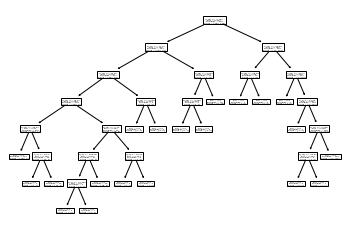

In [ ]:
from sklearn import tree
tree.plot_tree(clf)

# **LAB SET UP**
Execute antes de iniciar o Lab.

In [ ]:
#
# set up environment T9 Lab
#

#
# import basics
# 

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import warnings
import os
import seaborn as sns
warnings.filterwarnings("ignore") 

#
# Create all files for this lab: 
#
# projects.csv
# new_projects.csv
# insurance.csv
# new_insurance.csv
# breast.csv
# new_breast.csv
#

import pandas as pd


import pandas as pd
projects = pd.DataFrame({ 'Ana':[1,1,0,0],
                         'Gabriela':[1,1,0,0],
                         'Pedro':[0,1,1,1],
                         'Luiz':[1,1,0,1],
                         'Status':['successed','successed','failed','failed']})
projects.to_csv('projects.csv',index=False)

new_projects = pd.DataFrame({ 'Ana':[0,1],
                         'Gabriela':[1,1],
                         'Pedro':[1,1],
                         'Luiz':[0,0],
                         'Status':['?','?']})
new_projects.to_csv('new_projects.csv',index=False)

insurance    = pd.DataFrame({ 'Age':[21,20,35,40],
                         'Income':[5,3.5,8,12],
                         'Car_Value':[40,40,34,60],
                         'Years_Hab':[3,2,10,12],
                         'Insurance':['high','high','low','low']})
insurance.to_csv('insurance.csv',index=False)

new_insurance    = pd.DataFrame({ 'Age':[19,50,23],
                         'Income':[5,10,4],
                         'Car_Value':[50,45,80],
                         'Years_Hab':[1,15,1],
                         'Insurance':['?','?','?']})
new_insurance.to_csv('new_insurance.csv',index=False)

breast = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/breast-cancer-wisconsin.csv')
breast = breast.drop(columns=['Unnamed: 32'])
breast.to_csv('breast.csv',index=False)

new_breast = pd.DataFrame(breast.quantile(0)).transpose()
new_breast = pd.concat([new_breast, pd.DataFrame(breast.quantile(0.25)).transpose()])
new_breast = pd.concat([new_breast, pd.DataFrame(breast.quantile(0.50)).transpose()])
new_breast = pd.concat([new_breast, pd.DataFrame(breast.quantile(0.75)).transpose()])
new_breast = pd.concat([new_breast, pd.DataFrame(breast.quantile(1.00)).transpose()])
new_breast['diagnosis'] = '?'
# new_breast.drop(columns=['id'], inplace=True)
new_breast.to_csv('new_breast.csv',index=False)

from sklearn.tree import export_graphviz
import graphviz
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

def plot_tree(tree, dataframe, label_col, label_encoder, plot_title):
    label_names = pd.unique(dataframe[label_col])
    # Obtaining plot data.
    graph_data = export_graphviz(tree,
        feature_names=dataframe.drop(label_col, axis=1).columns,
        class_names=label_names,
        filled=True,
        rounded=True,
        out_file=None)
    # Generating plot.
    graph = graphviz.Source(graph_data)
    graph.render(plot_title)
    return graph

seed = 1984
